In [9]:
import pandas as pd
TCSV = pd.read_csv('dataset/titanic.csv')
TCSV.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
#Quanti ponti c'erano sulla nave?
TCSV['Deck'] = TCSV['Cabin'].str[0]
TCSV['Deck'].nunique ()

7

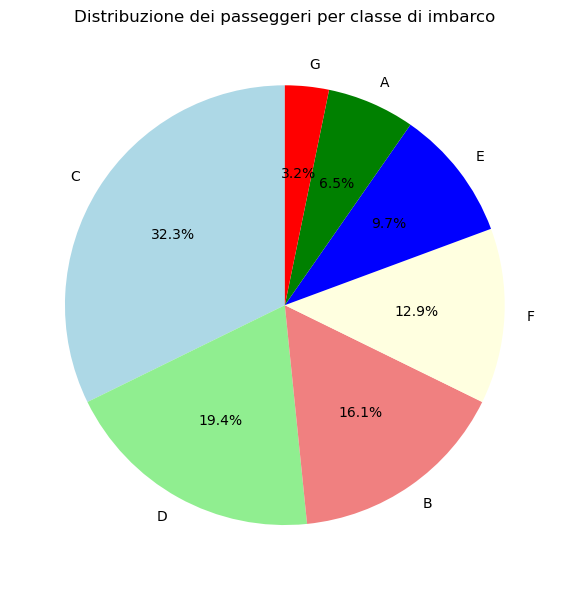

In [20]:
#Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco
import matplotlib.pyplot as plt
count_ponti = TCSV['Deck'].value_counts()

plt.figure(figsize=(8, 6))
count_ponti.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'blue', 'green', 'red'], startangle=90)
plt.title('Distribuzione dei passeggeri per classe di imbarco')
plt.ylabel('') 
plt.tight_layout()
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

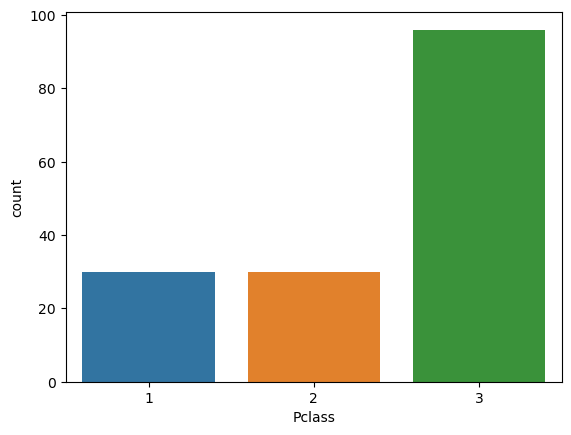

In [24]:
import seaborn as sns
sns.countplot(data=TCSV, x='Pclass')


<Figure size 100x300 with 0 Axes>

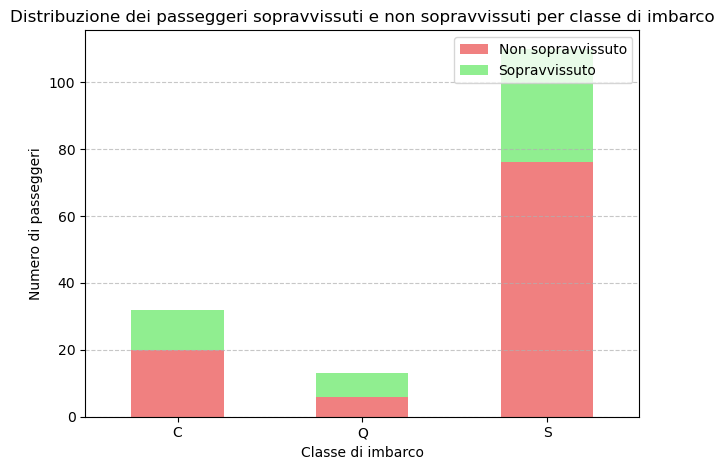

In [18]:
# Fare la stessa cosa per la colonna alive
import matplotlib.pyplot as plt

count_alive_embarked = TCSV.groupby(['Embarked', 'Survived']).size().unstack()

plt.figure(figsize=(1, 3))
count_alive_embarked.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Distribuzione dei passeggeri sopravvissuti e non sopravvissuti per classe di imbarco')
plt.xlabel('Classe di imbarco')
plt.ylabel('Numero di passeggeri')
plt.xticks(rotation=0)
plt.legend(['Non sopravvissuto', 'Sopravvissuto'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<Axes: xlabel='Survived', ylabel='count'>

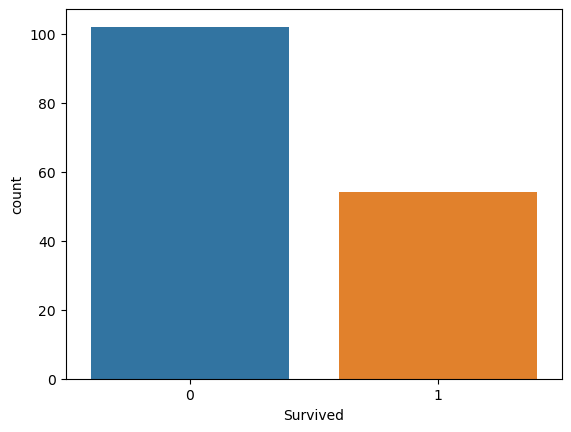

In [31]:
sns.countplot(data=TCSV, x='Survived')

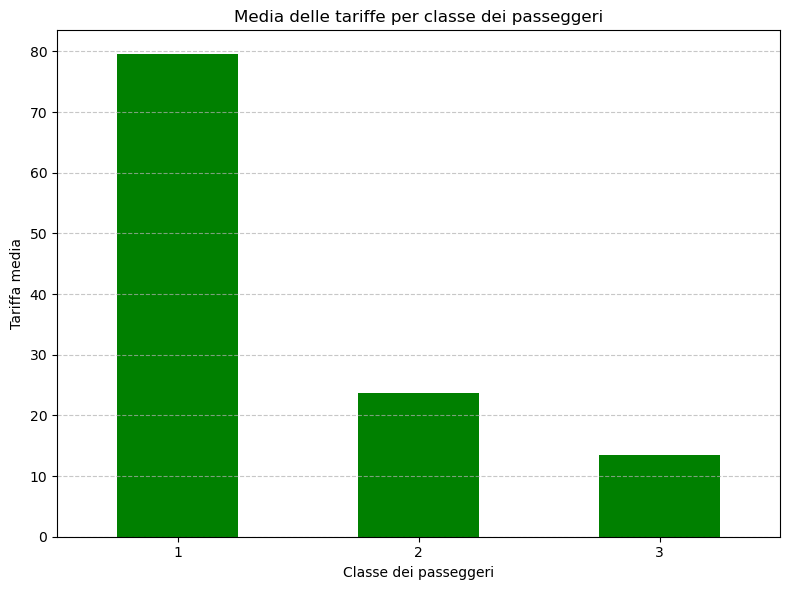

In [12]:
#Qual era la distribuzione delle tariffe (fare)?
import matplotlib.pyplot as plt

mean_fare_by_pclass = TCSV.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 6))
mean_fare_by_pclass.plot(kind='bar', color='green')
plt.title('Media delle tariffe per classe dei passeggeri')
plt.xlabel('Classe dei passeggeri')
plt.ylabel('Tariffa media')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

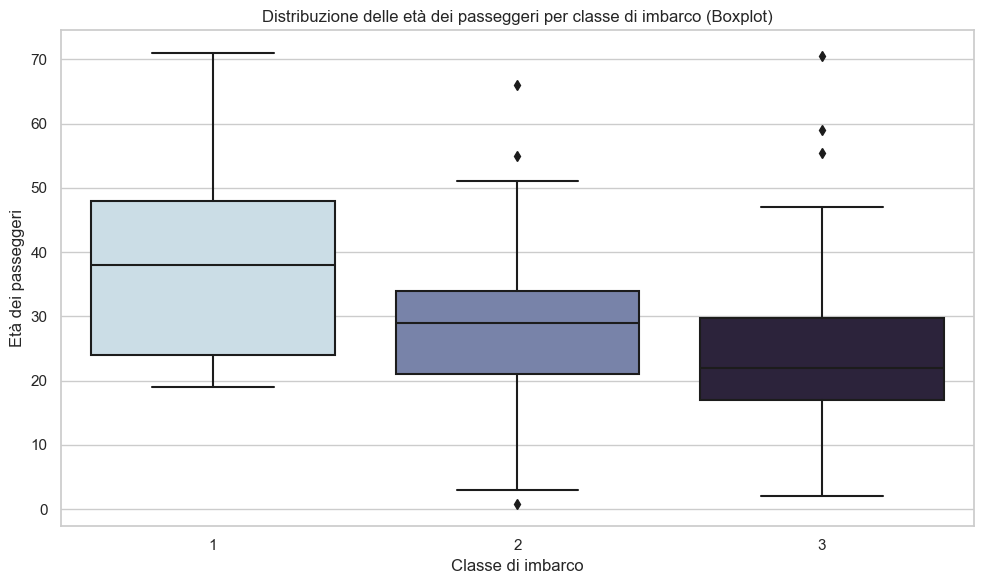

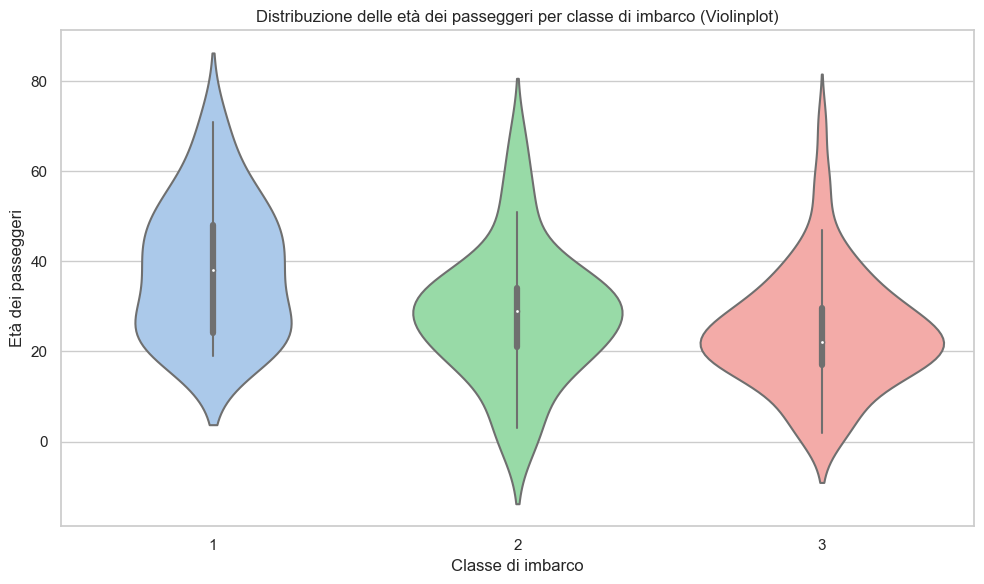

In [32]:
#Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con un violinplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=TCSV, palette='ch:s=.25,rot=-.25')
plt.title('Distribuzione delle età dei passeggeri per classe di imbarco (Boxplot)')
plt.xlabel('Classe di imbarco')
plt.ylabel('Età dei passeggeri')
plt.tight_layout()

plt.show()

# violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', data=TCSV, palette='pastel6')
plt.title('Distribuzione delle età dei passeggeri per classe di imbarco (Violinplot)')
plt.xlabel('Classe di imbarco')
plt.ylabel('Età dei passeggeri')
plt.tight_layout()

plt.show()

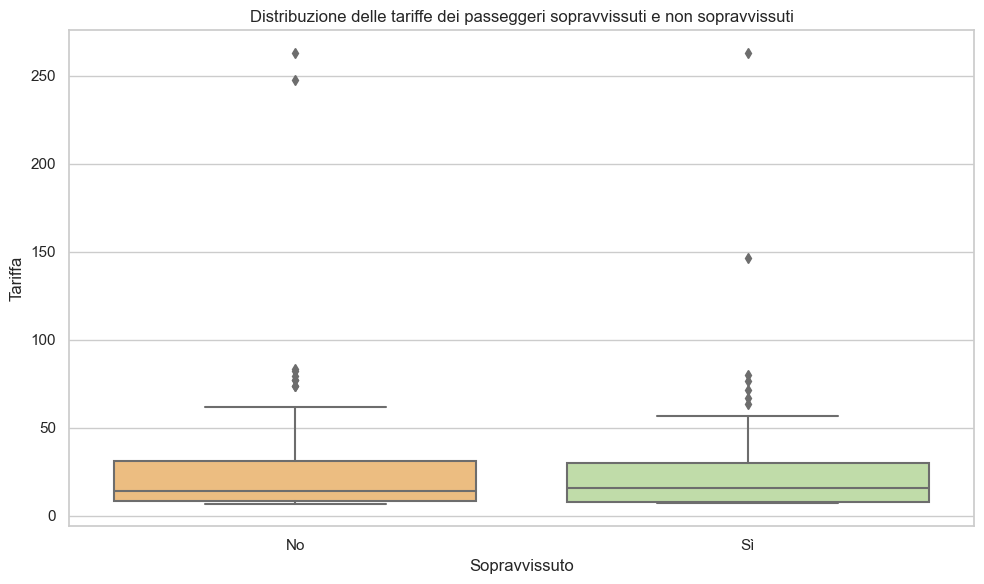

In [28]:
# Visualizziamo un boxplot rispetto alle colonne fare e survived; che cose ne deduciamo?
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=TCSV, palette = "Spectral")
plt.title('Distribuzione delle tariffe dei passeggeri sopravvissuti e non sopravvissuti')
plt.xlabel('Sopravvissuto')
plt.ylabel('Tariffa')
plt.xticks(ticks=[0, 1], labels=['No', 'Sì'])
plt.tight_layout()

plt.show()

In [77]:
import pandas as pd
SCSV = pd.read_csv('dataset/stockdata.csv')
SCSV.columns

Index(['MSFT', 'IBM', 'SBUX', 'AAPL', 'GSPC', 'Date'], dtype='object')

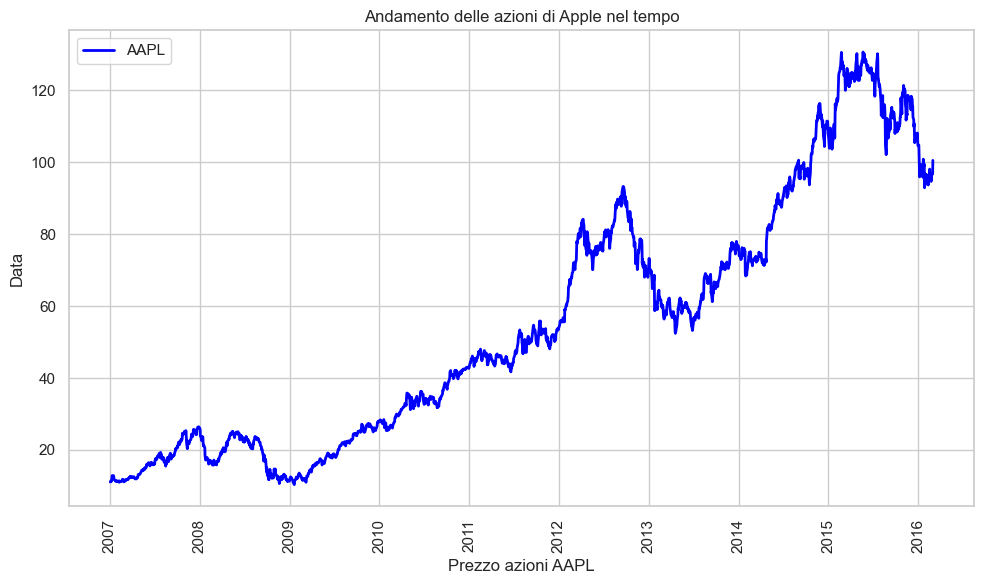

In [77]:
# Visualizziamo l'andamento delle azioni della Apple ("AAPL")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(SCSV['Date'], SCSV['AAPL'], color='blue', linewidth=2, label='AAPL')
plt.title('Andamento delle azioni di Apple nel tempo')
plt.xlabel('Prezzo azioni AAPL')
plt.ylabel('Data')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

C:\Users\acqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='AAPL'>

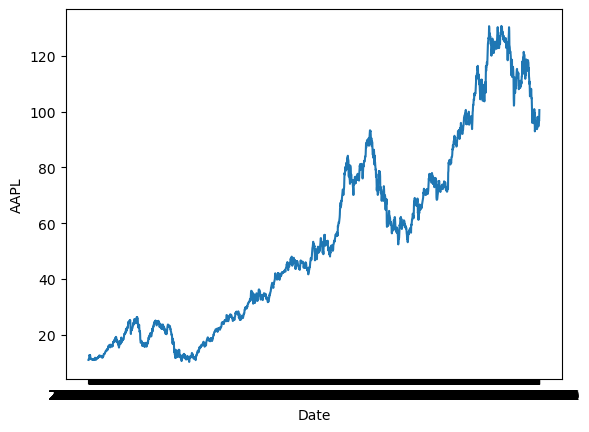

In [80]:
sns.lineplot(data=SCSV, x= 'Date', y = 'AAPL')

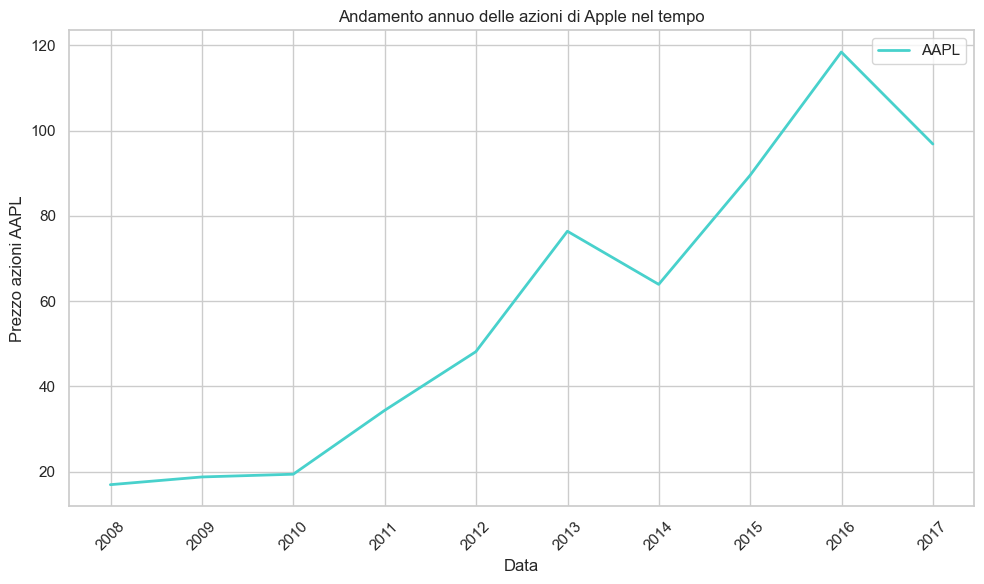

In [56]:
import matplotlib.pyplot as plt

SCSV['Date'] = pd.to_datetime(SCSV['Date'])

SCSV_anno = SCSV.set_index('Date').resample('Y')['AAPL'].mean()

plt.figure(figsize=(10, 6))
plt.plot(SCSV_anno.index, SCSV_anno.values, color='mediumturquoise', linewidth=2, label='AAPL')
plt.title('Andamento annuo delle azioni di Apple nel tempo')
plt.xlabel('Data')
plt.ylabel('Prezzo azioni AAPL')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

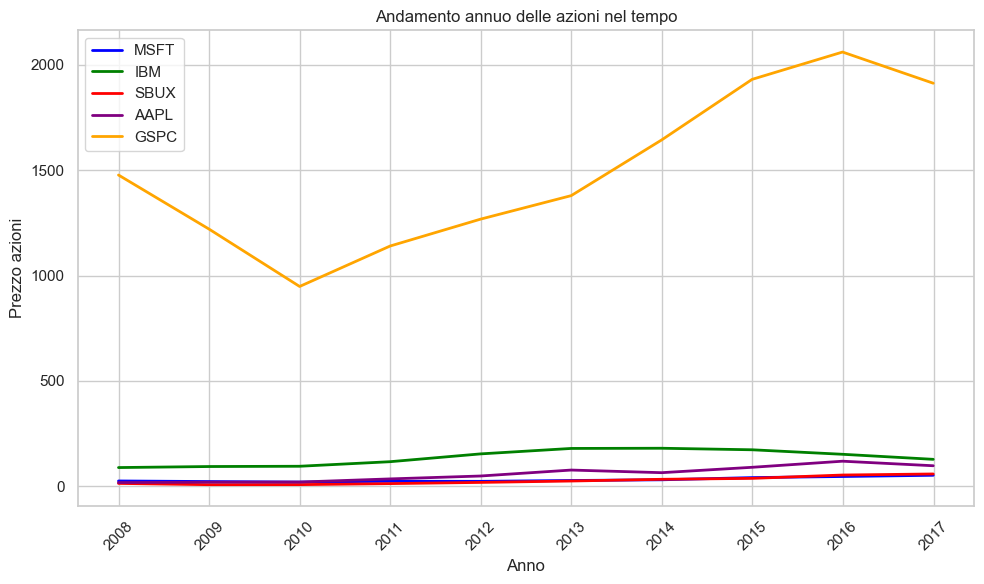

In [57]:
#Visualizziamo l'andamento di tutte le azioni del dataset
import matplotlib.pyplot as plt

SCSV['Date'] = pd.to_datetime(SCSV['Date'])

SCSV_anno_per_azione = SCSV.set_index('Date').resample('Y').mean()

colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))
for i, col in enumerate(SCSV_anno_per_azione.columns):
    plt.plot(SCSV_anno_per_azione.index, SCSV_anno_per_azione[col], color=colors[i], linewidth=2, label=col)

plt.title('Andamento annuo delle azioni nel tempo')
plt.xlabel('Anno')
plt.ylabel('Prezzo azioni')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

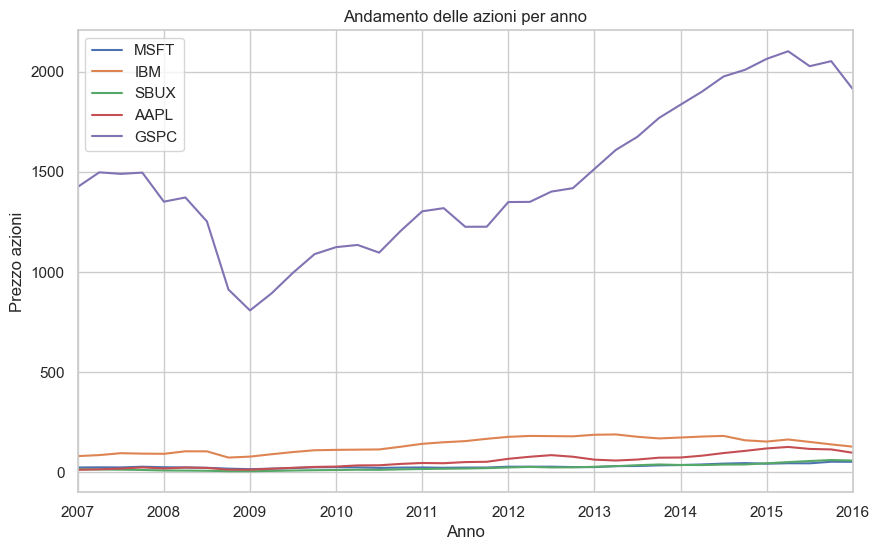

In [67]:
import matplotlib.pyplot as plt

azioni_annuali = SCSV.set_index('Date').resample('Q').mean()

azioni = ['MSFT', 'IBM', 'SBUX', 'AAPL', 'GSPC']

azioni_annuali[azioni].plot(figsize=(10, 6))

plt.title('Andamento delle azioni per anno')
plt.xlabel('Anno')
plt.ylabel('Prezzo azioni')

plt.show()

<Axes: >

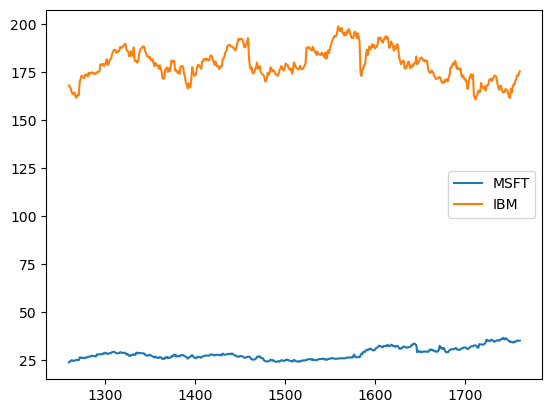

In [86]:
SCSV['Date'] = pd.to_datetime(SCSV['Date'])
filtro_anni = (SCSV['Date'].dt.year == 2012) | (SCSV['Date'].dt.year == 2013)
filtro_aziende = ['MSFT', 'IBM']
SCSV.loc[filtro_anni, filtro_aziende].plot()


<Figure size 1000x600 with 0 Axes>

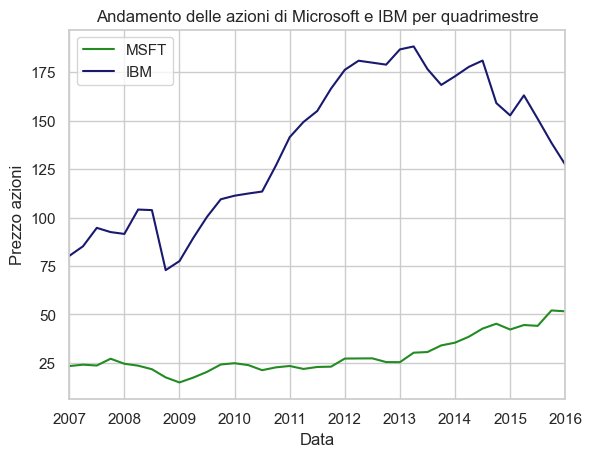

In [74]:
#Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
import matplotlib.pyplot as plt
SCSV['Date'] = pd.to_datetime(SCSV['Date'])
azioni_MF_IBM_quadrimestrali = SCSV.set_index('Date').resample('Q').mean()
azioni = ['MSFT', 'IBM']

plt.figure(figsize=(10, 6))
azioni_MF_IBM_quadrimestrali[azioni].plot(color = ['forestgreen', 'midnightblue'])

plt.title('Andamento delle azioni di Microsoft e IBM per quadrimestre')
plt.xlabel('Data')
plt.ylabel('Prezzo azioni')

plt.show()

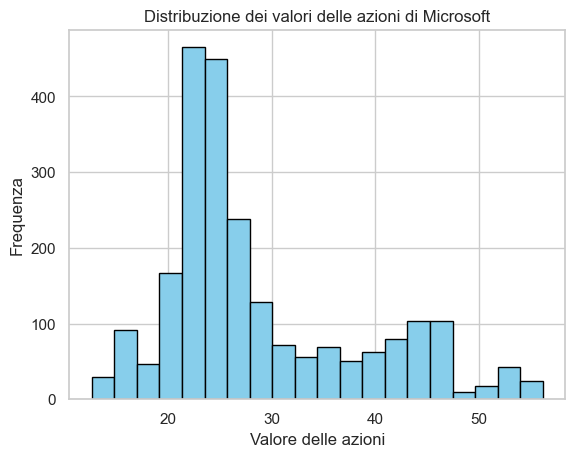

In [75]:
# Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso
import matplotlib.pyplot as plt
azioni_MSFT = SCSV['MSFT']
plt.hist(azioni_MSFT, bins=20, color='skyblue', edgecolor='black')

plt.title('Distribuzione dei valori delle azioni di Microsoft')
plt.xlabel('Valore delle azioni')
plt.ylabel('Frequenza')

plt.show()

In [84]:
import pandas as pd
MECSV = pd.read_csv('dataset/metal_bands_2017.csv', encoding='ISO-8859-1')
MECSV.columns 

Index(['id', 'band_name', 'fans', 'formed', 'origin', 'split', 'style'], dtype='object')

C:\Users\acqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


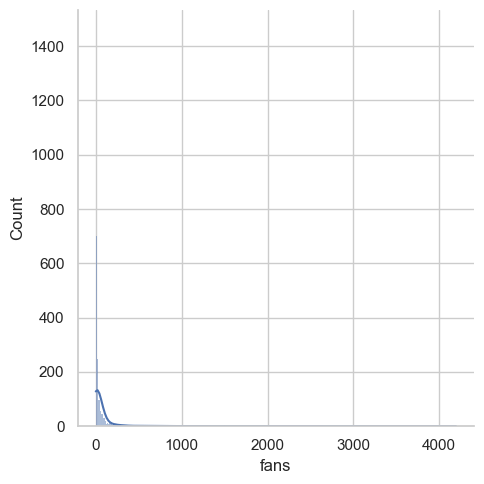

In [91]:
#Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot( data=MECSV["fans"], kde=True )

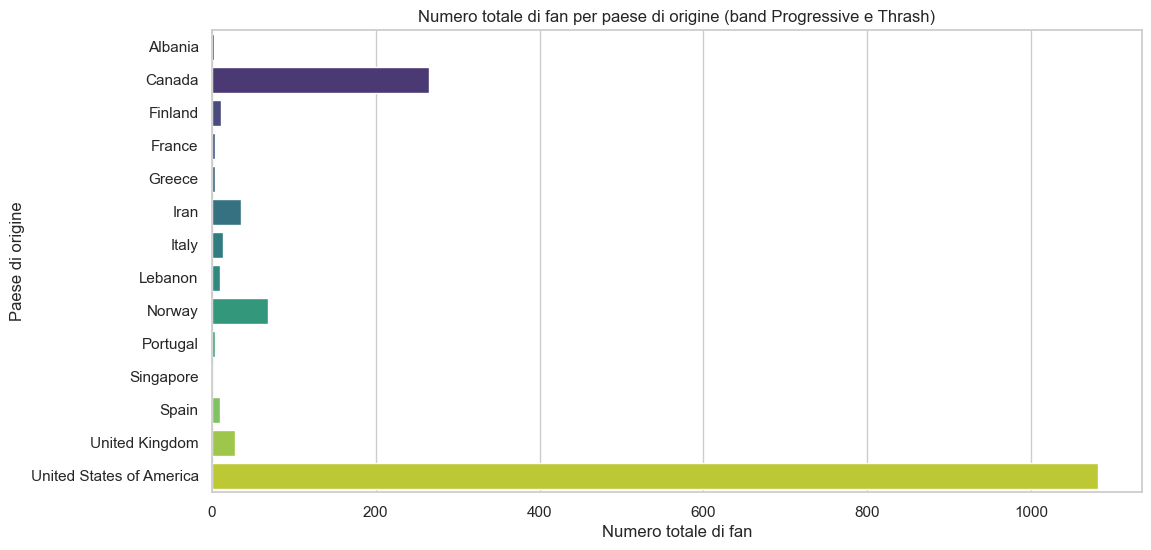

In [94]:
# Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine 
#(nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare ["style"] e non .style perché quest'ultimo è un metodo)
import seaborn as sns
import matplotlib.pyplot as plt
bands_progressive_thrash = MECSV[MECSV['style'].str.contains('Progressive') & MECSV['style'].str.contains('Thrash')]
total_fans_by_origin = bands_progressive_thrash.groupby('origin')['fans'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='fans', y='origin', data=total_fans_by_origin, palette='viridis')
plt.title('Numero totale di fan per paese di origine (band Progressive e Thrash)')
plt.xlabel('Numero totale di fan')
plt.ylabel('Paese di origine')
plt.show()

C:\Users\acqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


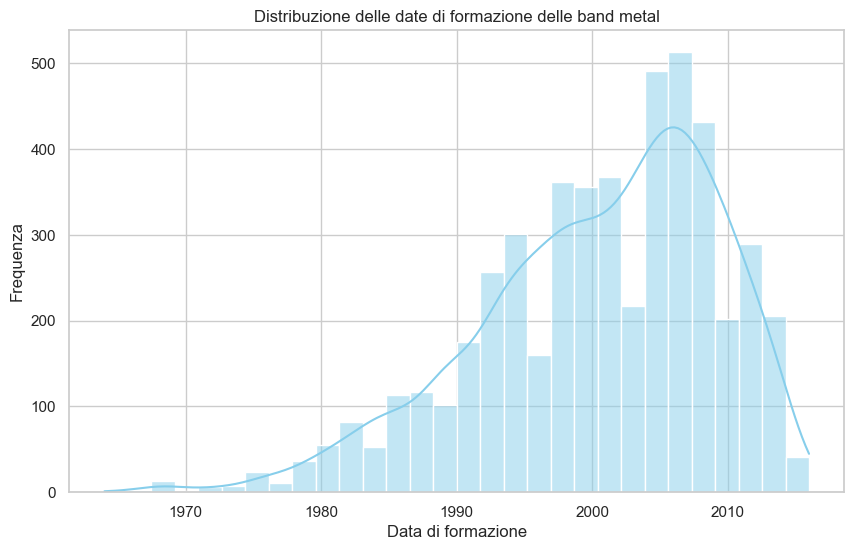

In [97]:
#Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?
import seaborn as sns
import matplotlib.pyplot as plt
MECSV['formed'] = pd.to_datetime(MECSV['formed'], errors='coerce') 
MECSV = MECSV.dropna(subset=['formed'])
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=MECSV, x='formed', kde=True, bins=30, color='skyblue')
plt.title('Distribuzione delle date di formazione delle band metal')
plt.xlabel('Data di formazione')
plt.ylabel('Frequenza')

plt.show()

In [2]:
import pandas as pd
ECSV = pd.read_csv('dataset/election.csv')
ECSV.columns

Index(['district', 'Coderre', 'Bergeron', 'Joly', 'total', 'winner', 'result',
       'district_id'],
      dtype='object')

C:\Users\acqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

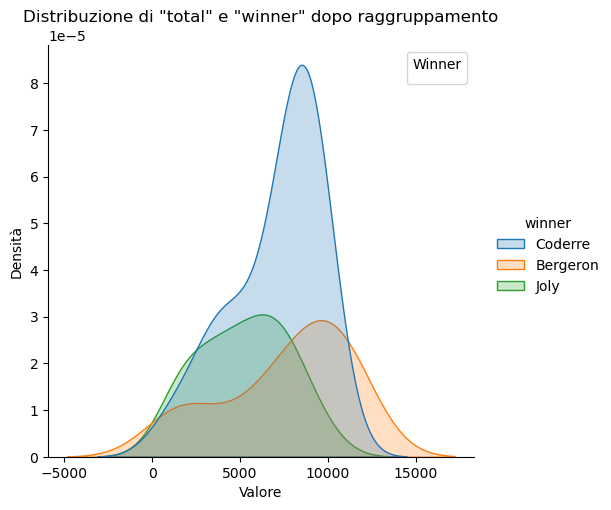

In [3]:
# Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)
import seaborn as sns
import matplotlib.pyplot as plt
grouped_data = ECSV.groupby(['total', 'winner']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.displot(data=grouped_data, x='total', hue='winner', kind='kde', fill=True)
plt.title('Distribuzione di "total" e "winner" dopo raggruppamento')
plt.xlabel('Valore')
plt.ylabel('Densità')
plt.legend(title='Winner')
plt.show()

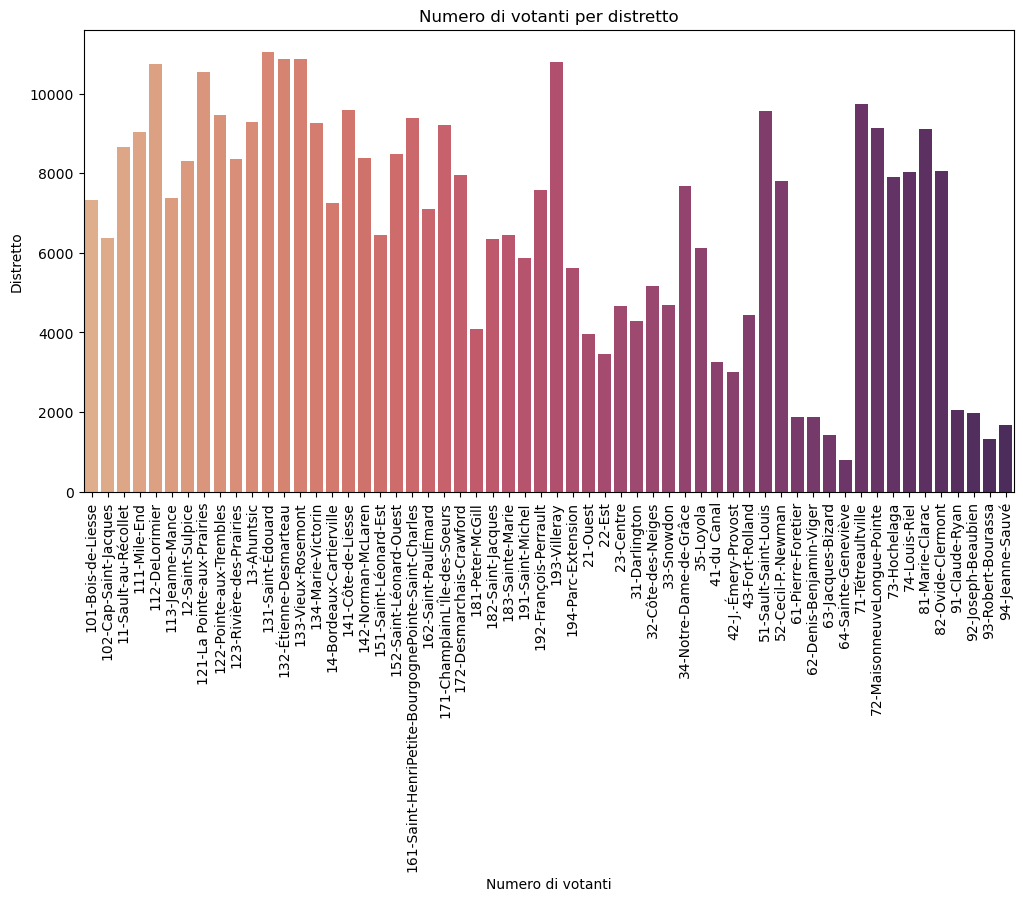

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt
voters_by_district = ECSV.groupby('district')['total'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='district', y='total', data=voters_by_district, palette='flare')
plt.title('Numero di votanti per distretto')
plt.xlabel('Numero di votanti')
plt.ylabel('Distretto')
plt.xticks(rotation=90)
plt.show()

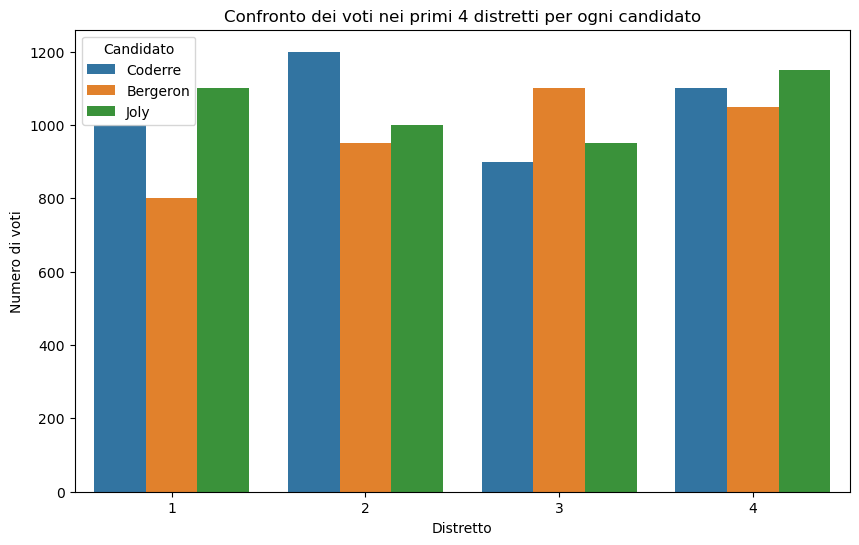

In [7]:
# Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti per ogni candidato
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'district': [1, 2, 3, 4],
    'Coderre': [1000, 1200, 900, 1100],
    'Bergeron': [800, 950, 1100, 1050],
    'Joly': [1100, 1000, 950, 1150]
}

df = pd.DataFrame(data)

df_long = df.melt(id_vars='district', var_name='Candidate', value_name='Votes')

plt.figure(figsize=(10, 6))
sns.barplot(x='district', y='Votes', hue='Candidate', data=df_long)
plt.title('Confronto dei voti nei primi 4 distretti per ogni candidato')
plt.xlabel('Distretto')
plt.ylabel('Numero di voti')
plt.legend(title='Candidato')
plt.show()

In [32]:
import pandas as pd
PCSV = pd.read_csv('dataset/party_in_nyc.csv')
PCSV.columns
# PCSV

Index(['Created Date', 'Closed Date', 'Location Type', 'Incident Zip', 'City',
       'Borough', 'Latitude', 'Longitude'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'NEW YORK'),
  Text(1, 0, 'BROOKLYN'),
  Text(2, 0, 'BRONX'),
  Text(3, 0, 'JACKSON HEIGHTS'),
  Text(4, 0, 'FOREST HILLS'),
  Text(5, 0, 'OZONE PARK'),
  Text(6, 0, 'FLUSHING'),
  Text(7, 0, 'ASTORIA'),
  Text(8, 0, 'CORONA'),
  Text(9, 0, 'JAMAICA'),
  Text(10, 0, 'FAR ROCKAWAY'),
  Text(11, 0, 'RIDGEWOOD'),
  Text(12, 0, 'STATEN ISLAND'),
  Text(13, 0, 'KEW GARDENS'),
  Text(14, 0, 'BAYSIDE'),
  Text(15, 0, 'FRESH MEADOWS'),
  Text(16, 0, 'WOODHAVEN'),
  Text(17, 0, 'SOUTH OZONE PARK'),
  Text(18, 0, 'EAST ELMHURST'),
  Text(19, 0, 'LONG ISLAND CITY'),
  Text(20, 0, 'QUEENS VILLAGE'),
  Text(21, 0, 'SUNNYSIDE'),
  Text(22, 0, 'SAINT ALBANS'),
  Text(23, 0, 'WOODSIDE'),
  Text(24, 0, 'HOWARD BEACH'),
  Text(25, 0, 'ROCKAWAY PARK'),
  Text(26, 0, 'LITTLE NEC

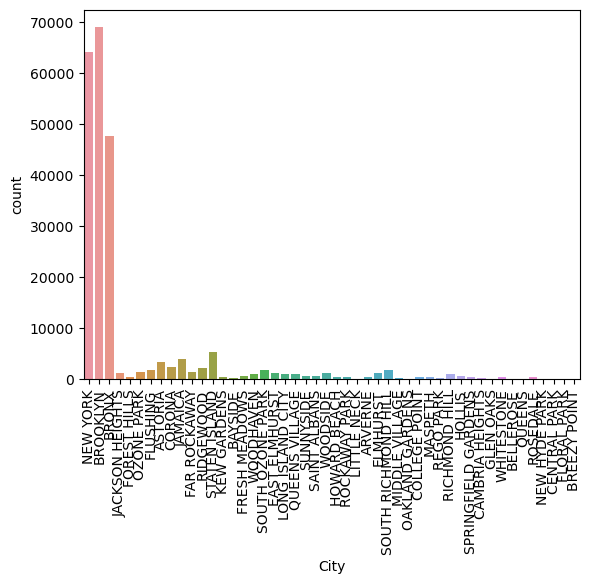

In [29]:
# Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=PCSV, x='City')
plt.xticks(rotation=90)

In [37]:
#Qual è il rettangolo di latitudine e longitudine considerato dal dataset?
lat = PCSV['Latitude'].unique()
long = PCSV['Longitude'].unique()
lat, long

(array([40.86618344, 40.85932419, 40.79941541, ..., 40.71577966,
        40.60373834, 40.62487717]),
 array([-73.91893043, -73.93123734, -73.95337117, ..., -73.97940589,
        -73.96058429, -73.9641742 ]))

In [47]:
min_lat = PCSV['Latitude'].min()
max_lat = PCSV['Latitude'].max()
min_lon = PCSV['Longitude'].min()
max_lon = PCSV['Longitude'].max()

print("Minima latitudine:", min_lat)
print("Massima latitudine:", max_lat)
print("Minima longitudine:", min_lon)
print("Massima longitudine:", max_lon)

Minima latitudine: 40.498819681472185
Massima latitudine: 40.91217840308113
Minima longitudine: -74.25127710072611
Massima longitudine: -73.70230256557906


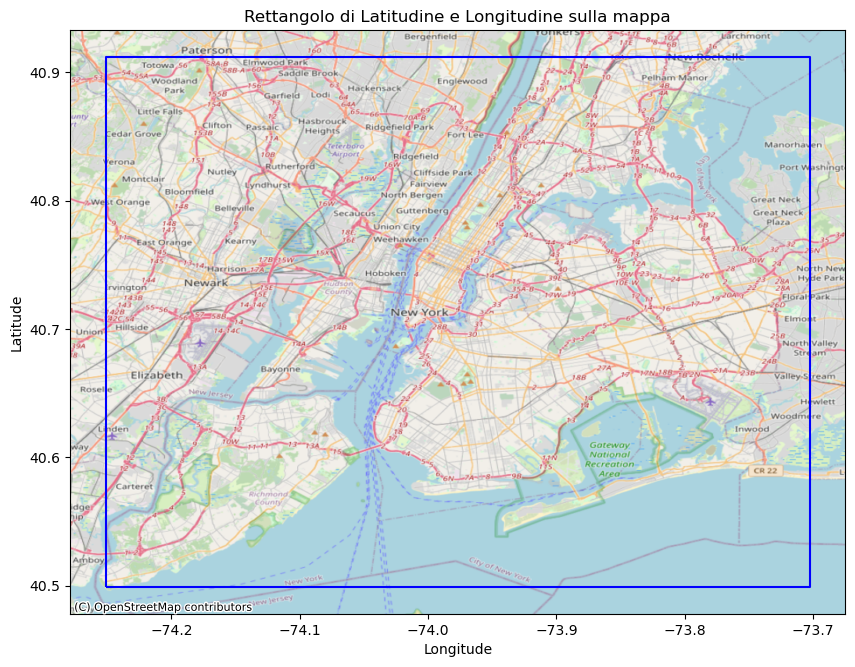

In [63]:
!pip install contextily

import geopandas as gpd
from shapely.geometry import Polygon
import contextily as ctx
import matplotlib.pyplot as plt

min_lon = -74.25127710072611  
max_lon = -73.70230256557906  
min_lat = 40.498819681472185  
max_lat = 40.91217840308113 

# rettangolo
polygon = Polygon([(min_lon, min_lat), (max_lon, min_lat), (max_lon, max_lat), (min_lon, max_lat)])

# Crea un GeoDataFrame con il poligono e imposta il CRS
gdf = gpd.GeoDataFrame(geometry=[polygon])
gdf.crs = "EPSG:4326" 

fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, color='blue') 

# contesto della mappa
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rettangolo di Latitudine e Longitudine sulla mappa')
plt.show()

In [68]:
# Quante segnalazioni sono state fatte per case private?

import pandas as pd
case_private = PCSV[PCSV['Location Type'] == 'Residential Building/House']
num_case_private = len(case_private)

print("Il numero di segnalazioni relative alle case private è:", num_case_private)

Il numero di segnalazioni relative alle case private è: 146040


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'MANHATTAN'),
  Text(1, 0, 'BROOKLYN'),
  Text(2, 0, 'BRONX'),
  Text(3, 0, 'QUEENS'),
  Text(4, 0, 'Unspecified'),
  Text(5, 0, 'STATEN ISLAND')])

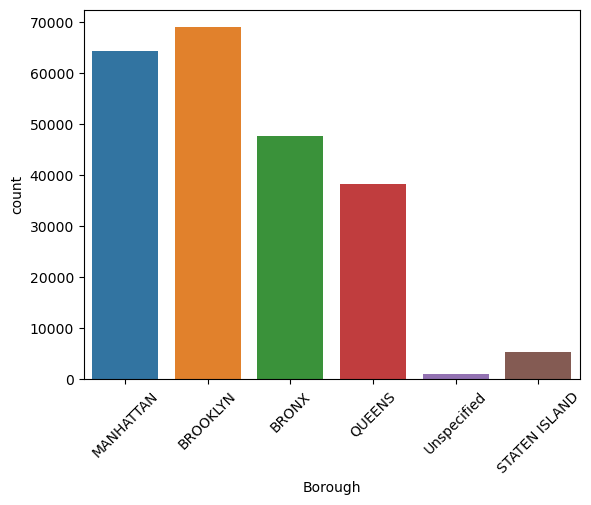

In [71]:
# Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?

sns.countplot (data=PCSV, x= 'Borough')
plt.xticks(rotation= 45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Store/Commercial'),
  Text(1, 0, 'Residential Building/House'),
  Text(2, 0, 'Club/Bar/Restaurant'),
  Text(3, 0, 'Street/Sidewalk'),
  Text(4, 0, 'Park/Playground'),
  Text(5, 0, 'House of Worship')])

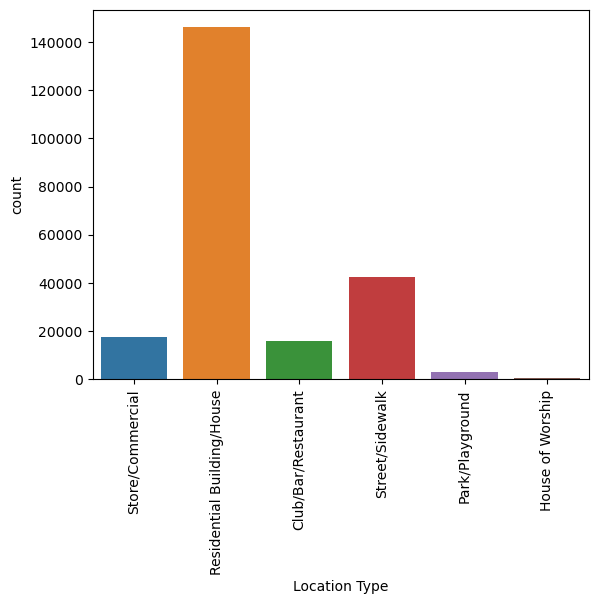

In [73]:
sns.countplot (data=PCSV, x= 'Location Type')
plt.xticks(rotation= 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'MANHATTAN'),
  Text(1, 0, 'BROOKLYN'),
  Text(2, 0, 'BRONX'),
  Text(3, 0, 'QUEENS'),
  Text(4, 0, 'Unspecified'),
  Text(5, 0, 'STATEN ISLAND')])

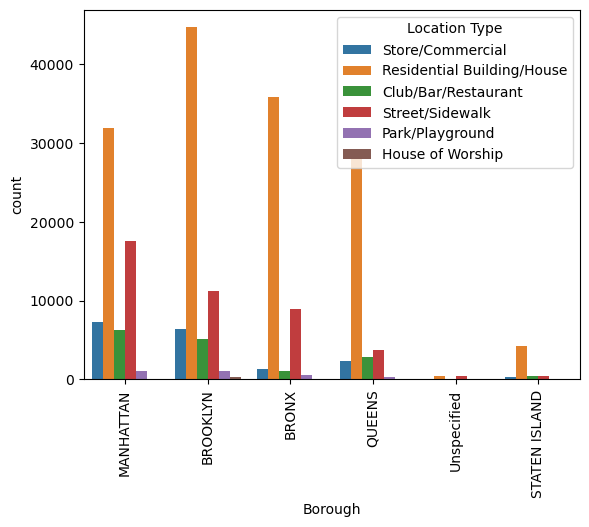

In [75]:
sns.countplot (data=PCSV, x= 'Borough', hue='Location Type')
plt.xticks(rotation= 90)